# Quantum Image Processing



In [1]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


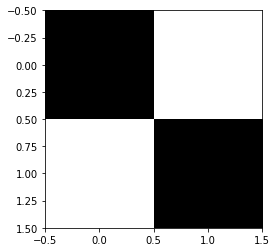

In [2]:
import matplotlib.pyplot as plt           #for plotting 
import numpy as np                        #array manipulation
from matplotlib.image import imread       #Reads an image from a file into an array.

input_im = [[0, 1],
            [1, 0]]

plt.imshow(input_im, cmap='gray') 

In [3]:
theta = []

for i in range(4):
    theta.append((pi/2)*(input_im[int(i>1)][i%2]))

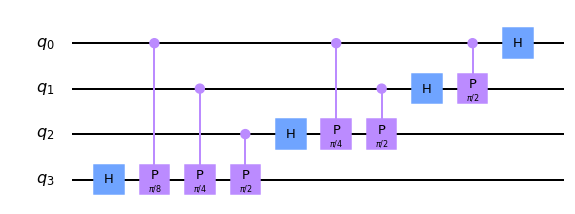

In [4]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qcTemp = QuantumCircuit(4)
qft_rotations(qcTemp,4)
qcTemp.draw('mpl')


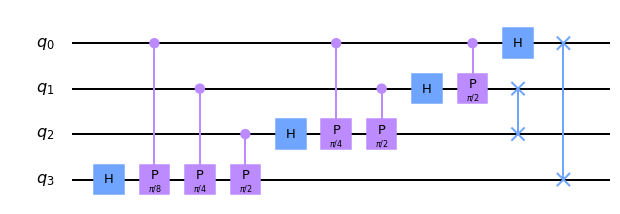

In [5]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qcTemp = QuantumCircuit(4)
qft(qcTemp,4)
qcTemp.draw('mpl')

In [6]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

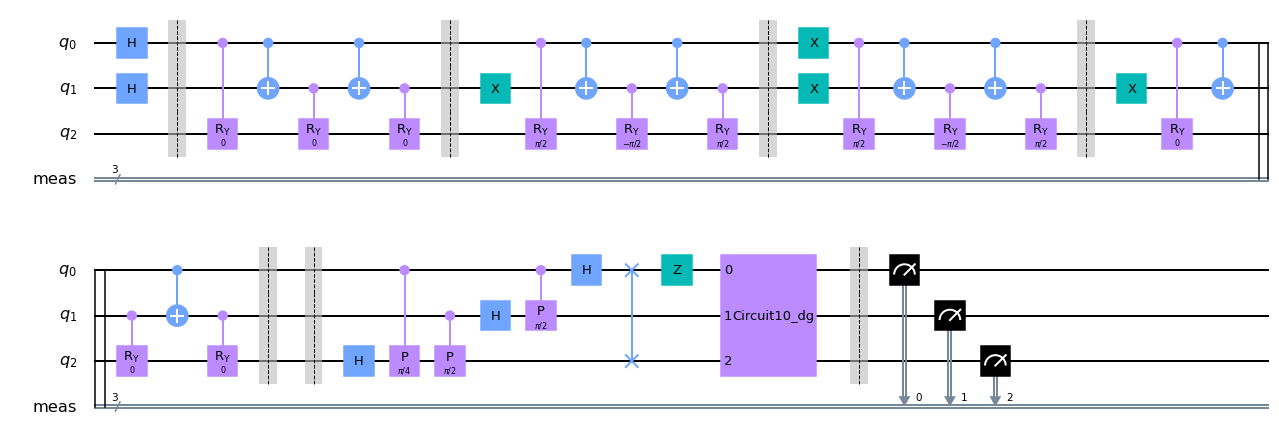

In [7]:
#theta = pi/2 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta[0],0,2)
qc.cx(0,1)
qc.cry(-theta[0],1,2)
qc.cx(0,1)
qc.cry(theta[0],1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta[1],0,2)
qc.cx(0,1)
qc.cry(-theta[1],1,2)
qc.cx(0,1)
qc.cry(theta[1],1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta[2],0,2)
qc.cx(0,1)
qc.cry(-theta[2],1,2)
qc.cx(0,1)
qc.cry(theta[2],1,2)


qc.barrier()

qc.x(1)

qc.cry(theta[3],0,2)
qc.cx(0,1)
qc.cry(-theta[3],1,2)
qc.cx(0,1)
qc.cry(theta[3],1,2)

qc.barrier()
qc.barrier()

################

qft(qc, 3)

qc.z(0)

inverse_qft(qc, 3)


################

qc.measure_all()

qc.draw('mpl')

{'001': 1031, '010': 1034, '100': 991, '111': 1040}


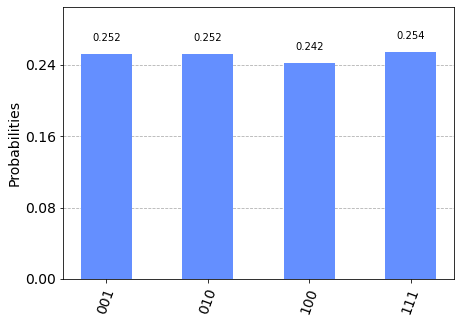

In [8]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=4096)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

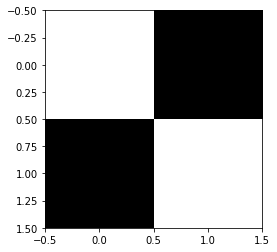

In [9]:
if '000' not in counts:
    counts['000'] = 0;
    
if '001' not in counts:
    counts['001'] = 0;
    
if '010' not in counts:
    counts['010'] = 0;
    
if '011' not in counts:
    counts['011'] = 0;
    
if '100' not in counts:
    counts['100'] = 0;
    
if '101' not in counts:
    counts['101'] = 0;
    
if '110' not in counts:
    counts['110'] = 0;
    
if '111' not in counts:
    counts['111'] = 0;
    


output_im = [[counts['100']/(counts['000'] + counts['100']), counts['101']/(counts['001'] + counts['101'])],
            [counts['110']/(counts['010'] + counts['110']), counts['111']/(counts['011'] + counts['111'])]]

plt.imshow(output_im, cmap='gray') 